In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
df = pd.read_csv('ing_transactions_220821.csv')

In [61]:
account_nums = df['Account'].unique()

In [62]:
print(df.isna().sum())
print(f'total nans: {df.isna().sum().sum()}')

Date              0
Account           0
Description       0
Credit         2351
Debit           593
dtype: int64
total nans: 2944


In [63]:
 df = df.fillna(0)

In [64]:
# Reverse df oldest to newest
df = df[::-1]

In [65]:
df['Credit'] = df['Credit'].astype(int)
df['Debit'] = df['Debit'].astype(int)

In [87]:
def eval_cum_sum(df):
    credit = df['Credit']
    debit = df['Debit']
    net = credit + debit
    cum_sum = np.cumsum(net)

    df['Net'] = net
    df['Cum sum'] = cum_sum
    return df


C:\Users\jason\AppData\Local\Temp/ipykernel_21792/478206517.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Net'] = net
C:\Users\jason\AppData\Local\Temp/ipykernel_21792/478206517.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cum sum'] = cum_sum
C:\Users\jason\AppData\Local\Temp/ipykernel_21792/478206517.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

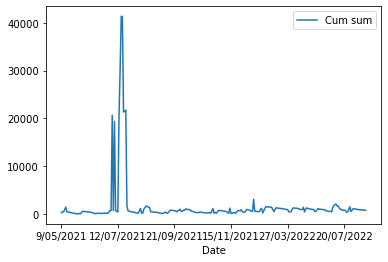

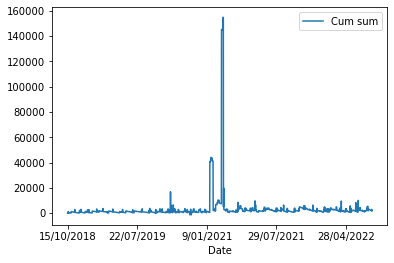

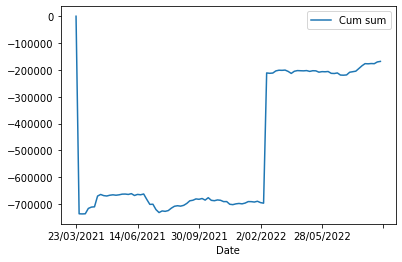

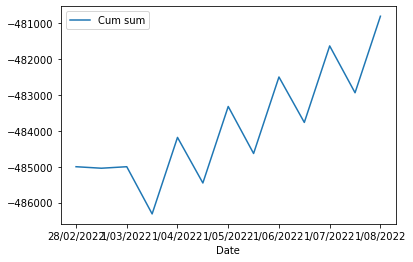

In [89]:
transactions = dict()
for account_num in account_nums:
    transactions[account_num] = df.loc[df['Account'] == account_num]
    transactions[account_num] = eval_cum_sum(transactions[account_num])
    transactions[account_num].plot(x = 'Date', y = 'Cum sum')

<AxesSubplot:xlabel='Date'>

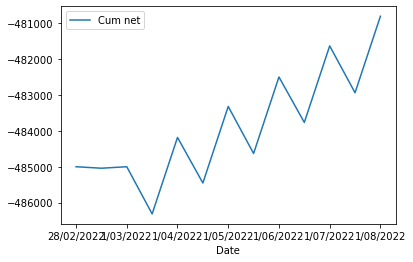

In [70]:
test.plot(x = 'Date', y = 'Cum sum')


In [85]:
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html